# Machine Learning (laboratory instruction)
## Multiclass classification

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 06-Classification metrics.ipynb
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal.

Learn how to use and read classification metrics.


### Task 1. Accuracy, recall and precision.

We can enumerate following statistical measures of the classification:
* True positive (TP)  - the sample is properly classified as positive
* False positive (FP) - the sample is wrongly classified as positive
* True negative (TN)  - the sample is properly classified as negative
* False negative (FN) - the sample is wrongly classified as negative

In all previous laboratories accuracy score has been used to measure the classifier performance:

$$
\texttt{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Read the classification results from `06-enemy.npz` file. This is the result of classifier that detects the enemy. There are two variables:
* `prediction` - the output of the classifier,
* `target` - the expected result.

The value 1 denotes there was an enemy near our radar, the value 0 denote it wasn't an enemy.

**Task**: Calculate the accuracy.


**Question**: Do you think the performence of the classifier is good?


**Task**: Calculate the sensitivity (recall, true positive rate):

$$
\texttt{Sensitivity} = \frac{TP}{TP + FN}
$$

**Question**: What do you think now about the classifier?

**Task**:
Calculate the precision:

$$
\texttt{Precision} = \frac{TP}{TP + FP}
$$

**Task**:
Calculate the specificity (true negative rate):

$$
\texttt{Specificity} = \frac{TN}{TN + FP}
$$


**Question**: Write your conclusions.








In [67]:
# >>> WRITE YOUR CODE BELOW <<<
import sklearn.datasets
import numpy as np
from tqdm import tqdm

with open('06-enemy.npz', 'rb') as f:
    data = np.load(f)
    print(data)
    predictions, targets = data['predictions'], data['target']
print(predictions.shape)


def calculate_measures(predictions, targets):
    tp, tn, fp, fn = 0, 0, 0, 0
    for pred, t in zip(predictions, targets):
        if pred == 1 and t == 1:
            tp += 1
        elif pred == 1 and t == 0:
            fp += 1
        elif pred == 0 and t == 0:
            tn += 1
        elif pred == 0 and t == 1:
            fn += 1
    return tp, tn, fp, fn

    


tp, tn, fp, fn = calculate_measures(predictions, targets)
print(f"True Positive  {tp}  | False Positive {fp}")
print(f"True Negative  {tn}  | False Negative {fn}")
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn) * 100:.2f}%")
print(f"Sensitivity: {tp/(tp + fn) * 100:.2f}%")
print(f"Precision: {tp/(tp + fp) * 100:.2f}%")
print(f"Specificity: {tn/(tn + fp) * 100:.2f}%")

(1000,)
True Positive  980  | False Positive 19
True Negative  1  | False Negative 0
Accuracy: 98.10%
Sensitivity: 100.00%
Precision: 98.10%
Specificity: 5.00%


We can see that the model boasts a high accuracy score. This could lead us to believe that the classification is near perfect and the model is well trained. However we can look at the other statistics:

#### 1. Sensitivity
Sensitivity represents the ratio of correctly predicted positive samples to all positive samples (true positive + false negative) in the dataset. We can see that sensitivity is at 100%, which means that all positive samples were correctly classified.

#### 2. Precision
Precision informs as about what percentage of positive predictions were correct. In this case, precision is very high meaning that the positive predictions are true in 98% of the cases.

#### 3. Specificity
This parameter is the equivalent of sensitivity for negative samples - it represents a ratio of correctly predicted  negative samples to all negative samples. In our case, specificity is very low - only 5% of negative examples were predicted correctly.

If we analyse the numeric values of TP, TN, FP, and FN, we can observe that the dataset is heavily skewed towards the positive samples - Negative samples (False Positive + True Negative) only amount to 20 out of 1000 (2%) of the samples. This causes big bias towards the positive samples which would lower the overall accuracy of the model when presented with more balanced dataset.


### Task 2. Receiver operating characteristic.

1. Read the data from `device.npz`. This is the dataset used in one of previous laboratory.

2. Use your logistic regression implementation to train the model on this data (you can copy and paste your previous code).

3. Calculate the metrics: accuracy, precision, specificity, sensitivity.

4. You used the threshold 0.5 to classify the sample to 0 or 1 (if the value is $\ge 0.5$ you classify it as positive (1) and if the value is $< 0.5$ then you classify it as negative sample (0)).

    1. Calculate the `sensitivity` (true positive rate - TPR) and `1 - specificity` (false positive rate - FPR) for various threshold values in range between 0 and 1 (you can generate such values using `np.linspace(0, 1, 1000)`. In other words you need to calculate the prediction for all of above values and calculate the metrics.
    2. Display the line chart with TPR on the y-axis and FPR on the x-axis.
    
    
*Note: Perfectly, we would like to have a model that maximizes the TPR and minimizes the FPR.*

*Note: In practice there you may need to use different metrics such as precision/recall curve.*




(500, 100) (500, 100) (500,) (500,)


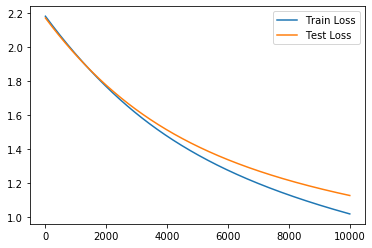

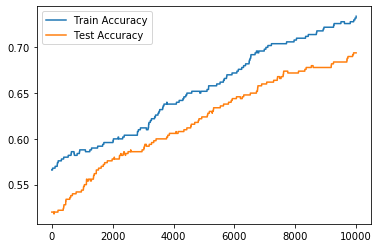

In [39]:
# >>> WRITE YOUR CODE BELOW <<<
import numpy as np
import sklearn
from sklearn import *
import matplotlib.pyplot as plt

with open('device.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.5, random_state=123, shuffle=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

from numba import njit

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def to_labels(x, w, treshold=0.5):
    h = sigmoid(x @ w.T)
    h[h >= treshold] = 1
    h[h < treshold] = 0
    return h

def accuracy(predictions, targets):
    return (predictions == targets).sum() / predictions.shape[0]

def log_loss(x, w, targets, l = 0):
    predictions = sigmoid(x @ w.T)
    return (1/x.shape[0]) * np.sum((-targets * np.log(predictions) - (1 - targets) * np.log(1 - predictions))) + l * np.linalg.norm(w)**2

def grad(x, w, targets, l = 0):
    predictions = sigmoid(x @ w.T)
    return (1 / targets.shape[0]) * (x.T @ np.subtract(predictions, targets)) + (2 * l * w)

w = np.random.uniform(size=(100,))
lr = 3e-4
epochs = 10000
l = 0
history = {'train': [], 'test': []}
acc = {'train': [], 'test': []}
for i in range(epochs):
    error = log_loss(x_train, w, y_train, l)
    w -= lr * grad(x_train, w, y_train, l)
    history['train'].append(error)
    labels = to_labels(x_train, w)
    acc['train'].append(accuracy(labels, y_train))
    
    test_error = log_loss(x_test, w, y_test, l)
    history['test'].append(test_error)
    test_labels = to_labels(x_test, w)
    acc['test'].append(accuracy(test_labels, y_test))

#print(f'Final error (train): {history["train"][-1]} | Final error (test): {history["test"][-1]} ')
#print(f'Final weights: {w}')
plt.plot(history['train'], label='Train Loss')
plt.plot(history['test'], label='Test Loss')
plt.legend()
plt.show()

plt.plot(acc['train'], label='Train Accuracy')
plt.plot(acc['test'], label='Test Accuracy')
plt.legend()
plt.show()

Train Dataset
Accuracy: 0.734
Sensitivity: 0.7041666666666667
Precision: 0.7316017316017316
Specificity: 0.7615384615384615
Test Dataset
Accuracy: 0.694
Sensitivity: 0.683206106870229
Precision: 0.7188755020080321
Specificity: 0.7058823529411765


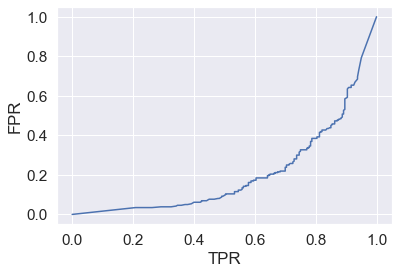

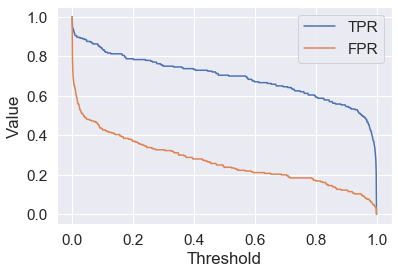

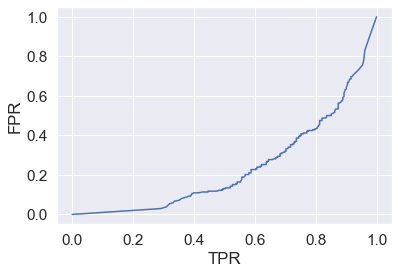

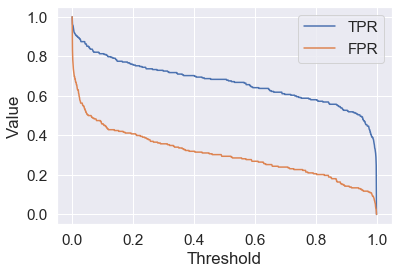

In [64]:
thresholds = np.linspace(0, 1, 1000)

tp, tn, fp, fn = calculate_measures(to_labels(x_train, w), y_train)
print("Train Dataset")
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn)}")
print(f"Sensitivity: {tp/(tp + fn)}")
print(f"Precision: {tp/(tp + fp)}")
print(f"Specificity: {tn/(tn + fp)}")

tp, tn, fp, fn = calculate_measures(to_labels(x_test, w), y_test)
print("Test Dataset")
print(f"Accuracy: {(tp + tn)/(tp + tn + fp + fn)}")
print(f"Sensitivity: {tp/(tp + fn)}")
print(f"Precision: {tp/(tp + fp)}")
print(f"Specificity: {tn/(tn + fp)}")

for x_t, y_t in zip([x_train, x_test], [y_train, y_test]):
    x = np.zeros_like(thresholds)
    y = np.zeros_like(thresholds)

    for i in range(len(thresholds)):
        tp, tn, fp, fn = calculate_measures(to_labels(x_t, w, thresholds[i]), y_t)
        x[i] = tp/(tp + fn)
        y[i] = 1 - (tn/(tn + fp))
    plt.xlabel("TPR")
    plt.ylabel("FPR")
    plt.plot(x, y)
    plt.show()
    plt.plot(thresholds, x, label="TPR")
    plt.plot(thresholds, y, label="FPR")
    plt.xlabel("Threshold")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

### Task 3: Confusion matrix.

The confusion matrix helps to visualize the classifier performance in table. Each row of the matrix represents the predicted class, while each column represents the ground truth (the actual class). In this task you can use implementation that is available in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) library.

1. Read the data `06-animals.npz` (the data contains target and predictions).

2. Calculate the confusion matrix.

3. Display the confusion matrix using `matplotlib` (labels should be visible and it should be clear which are predictions and which are actual classes).


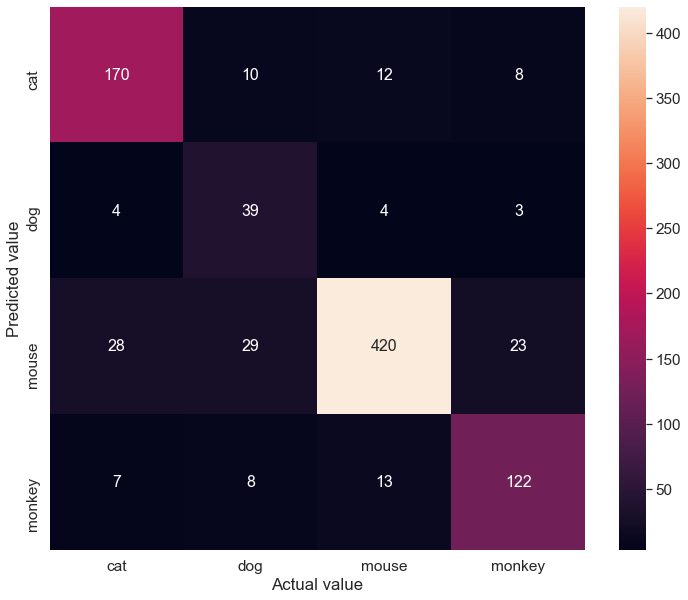

In [60]:
# >>> WRITE YOUR CODE BELOW <<<
plt.figure(figsize=(12,10))
with open('06-animals.npz', 'rb') as f:
    data = np.load(f)
    predictions, targets, classes = data['predictions'], data['target'], data['classes']

matrix = sklearn.metrics.confusion_matrix(targets, predictions,labels =  np.arange(len(classes)))

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(matrix, classes, classes)
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})

plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()